# Дипломное задание
Данные - реальная компания, продающая оборудование. Они подкорректированные , т.к. под NDA  
Берем оттуда месяц и год продаж, клиенты, сумма продаж.  
Необходимо проанализировать продажи и дать рекомендации бизнесу  
По итогу   
дадим рекомендацию по кол-во сейос менеджеров в отделе продаж  
предскажим оборот на ближайщее время  
построим модели , предсказывающие продажи в августе  

In [2]:
import numpy as np
import pandas as pd # Для работы с данными

In [2]:
# read_file = pd.read_html('client_months_with_category.html')
# read_file = pd.read_html('Clients_month_without_category_9.html')

In [3]:
# df = read_file[0].copy()

In [2]:
# df.head()

приводим год и месяц к единному значению в виде MonthCYYear

In [5]:
# for i in range(44):
#     df[i+1][2] = str(df[i+1][2]) + 'CY' + str(df[i+1][1])

In [3]:
# df_columns = ['Клиент']
# for i in range(1,45): # 46 с категориями
#     df_columns.append(df[i][2])


In [4]:
#название столбцов - месяц и год
# df.columns = df_columns

In [9]:
# df.drop([0, 2], inplace = True)
# df = df.reset_index(drop=True)

In [10]:
# df.drop([0, 0], inplace = True)
# df = df.reset_index(drop=True)

In [11]:
# for i in range(10):
#     df['Клиент'][i] = 'Клиент' + str(i) #убираем реальные названия клиентов для отображения

In [5]:
# df.head()

In [ ]:
# df['Категория'].fillna('Неопределена', inplace = True)

In [6]:
#Если холдинг (клиент) непределен, то называем его Неизвестен
# df['Клиент'].fillna('Неизвестен', inplace = True)

In [14]:
# for i in df_columns[1:]:
#     df[i].fillna(0, inplace = True)
    
   

In [7]:
# df.head(5)

In [8]:
# df.shape

In [10]:
#приводим значения к числу, т.к. есть пробелы и т.д.
# for i in df_columns[1:]:
#     df[i] = df[i].str.replace(',.*', '')
#     df[i].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
#     df[i] = df[i].astype(float)
#     df[i].fillna(0, inplace = True)


In [9]:
# df.head()

In [20]:
# df.to_csv('Data_file.csv')

In [24]:
df = pd.read_csv('Data_file.csv')

In [25]:
df.head()

,Unnamed: 0,Клиент,01CY2019,02CY2019,03CY2019,04CY2019,05CY2019,06CY2019,07CY2019,08CY2019,...,11CY2021,12CY2021,01CY2022,02CY2022,03CY2022,04CY2022,05CY2022,06CY2022,07CY2022,08CY2022
0,0,Клиент0,4785.2,324.8,697.0,2250.0,18008.4,312.4,1517.8,3446.6,...,13940.4,30524.4,14192.2,18034.4,35431.0,33341.4,3313.4,7553.4,0.2,0.0
1,1,Клиент1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1674.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Клиент2,0.0,0.0,2804.8,1196.0,12240.0,0.0,0.0,0.0,...,0.0,290.4,0.0,4640.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Клиент3,0.0,0.0,0.0,17570.0,0.0,2620.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Клиент4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9208.0,8897.6,0.0,0.0,0.0,0.0,0.0,1898.0,0.0,0.0


In [5]:
from chart_studio import plotly
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [28]:
# df_columns = ['Клиент']
# for i in range(1,45): # 46 с категориями
#      df_columns.append(df[i][2])
        
# название столбцов - месяц и год
df_columns = df.columns

In [29]:
df_columns[33:44]

Index(['09CY2021', '10CY2021', '11CY2021', '12CY2021', '01CY2022', '02CY2022',
       '03CY2022', '04CY2022', '05CY2022', '06CY2022', '07CY2022'],
      dtype='object')

In [30]:
#оставим лишь период 12 месяцев : с июля
for i_column in df_columns[1:32]:
    df.drop(i_column, axis=1, inplace=True)

In [31]:
df_columns = df.columns

In [32]:
df.head()

,Клиент,08CY2021,09CY2021,10CY2021,11CY2021,12CY2021,01CY2022,02CY2022,03CY2022,04CY2022,05CY2022,06CY2022,07CY2022,08CY2022
0,Клиент0,42902.8,43678.0,56450.2,13940.4,30524.4,14192.2,18034.4,35431.0,33341.4,3313.4,7553.4,0.2,0.0
1,Клиент1,0.0,0.0,0.0,1674.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Клиент2,0.0,441.2,8400.0,0.0,290.4,0.0,4640.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Клиент3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Клиент4,0.0,0.0,0.0,9208.0,8897.6,0.0,0.0,0.0,0.0,0.0,1898.0,0.0,0.0


In [33]:
#считаем оборот компании
Sum_turnover_list = []

for i in df_columns[1:]:
    Sum_turnover_list.append( df[i][ df[i] > 0 ].sum())

# print(Sum_turnover_list)

df_turnover_months = pd.Series(Sum_turnover_list)
df_turnover_months.index = df_columns[1:]


In [96]:
# df_turnover_months.head()
# df_turnover_months.index

In [34]:
df_turnover_months = pd.DataFrame({'Month':df_turnover_months.index, 'Turnover':df_turnover_months.values})

строим график оборота компании

<ipython-input-35-c93f5659494b>:24: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



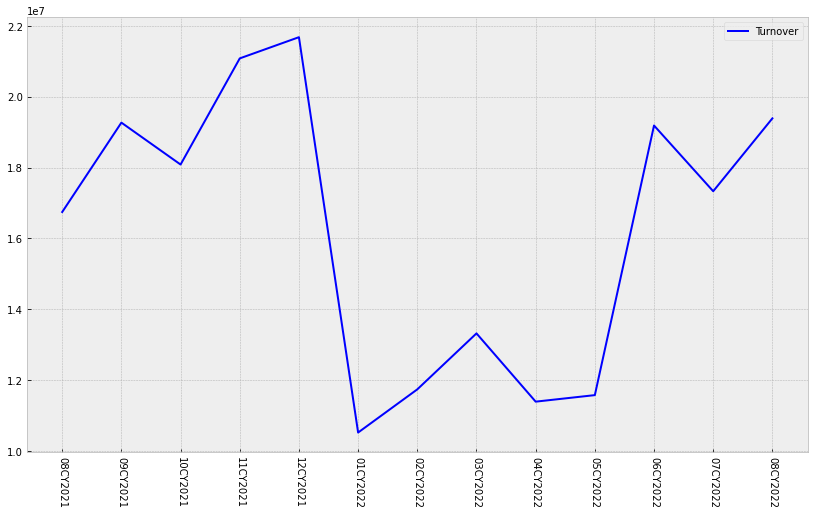

In [35]:
#X and Y axis inputs for Plotly graph. We use Scatter for line graphs
# plot_data = [
#     go.Scatter(
#         x=df_turnover_months['Month'],
#         y=df_turnover_months['Turnover'],
#     )
# ]

# plot_layout = go.Layout(
#         xaxis={"type": "category"},
#         title='Montly Revenue'
#     )
# fig = go.Figure(data=plot_data, layout=plot_layout)

# pyoff.iplot(fig)

with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = df_turnover_months['Month']#plt.axes()
#     best_mdl.plot_predict(1, len(series)+100, ax=ax)
    plt.plot(df_turnover_months['Month'],
             df_turnover_months['Turnover'] , color='blue', label='Turnover') #(1, len(series)+100, ax=ax)
    plt.legend()
    plt.xticks (Rotation = -90)
    plt.show()

строим график процентного отношения оборота текущего месяца к предыдущему

<ipython-input-36-62642aeeb3f2>:28: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



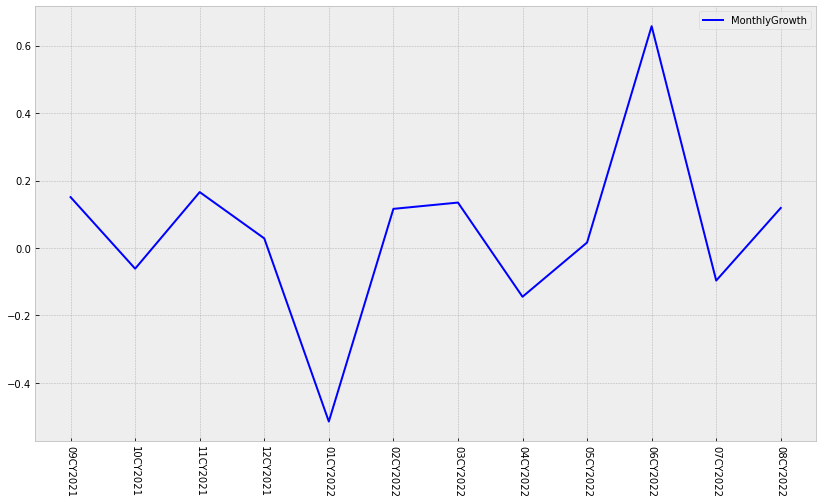

In [36]:
#using pct_change() function to see monthly percentage change
df_turnover_months['MonthlyGrowth'] = df_turnover_months['Turnover'].pct_change()

#showing first 5 rows
# df_turnover_months.head()

#visualization - line graph
# plot_data = [
#     go.Scatter(
#         x=df_turnover_months['Month'],
#         y=df_turnover_months['MonthlyGrowth'],
#     )
# ]

# plot_layout = go.Layout(
#         xaxis={"type": "category"},
#         title='Montly Growth Rate'
#     )

# fig = go.Figure(data=plot_data, layout=plot_layout)
# pyoff.iplot(fig)
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = df_turnover_months['Month']#plt.axes()
#     best_mdl.plot_predict(1, len(series)+100, ax=ax)
    plt.plot(df_turnover_months['Month'],
             df_turnover_months['MonthlyGrowth'] , color='blue', label='MonthlyGrowth') 
    plt.xticks (Rotation = -90)
    plt.legend()
    plt.show()

очевидно, что пик продаж в декабре и самые маленькие продажи в мае

проанализируем количество клиентов каждый месяц, оборот которых больше clients_turnover_int каких-то едениц
берем 2 тыс , т.к. это основные клиенты приносящие доход (оборот)

<ipython-input-37-c04fe41b98ad>:22: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



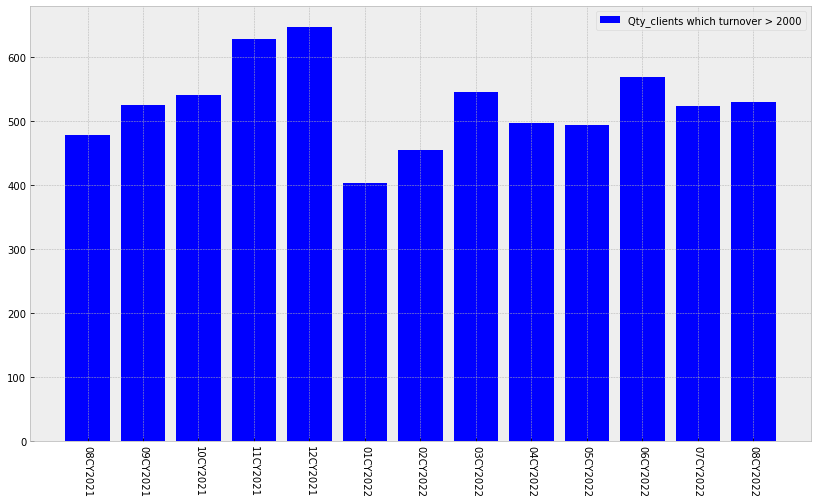

<ipython-input-37-c04fe41b98ad>:22: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



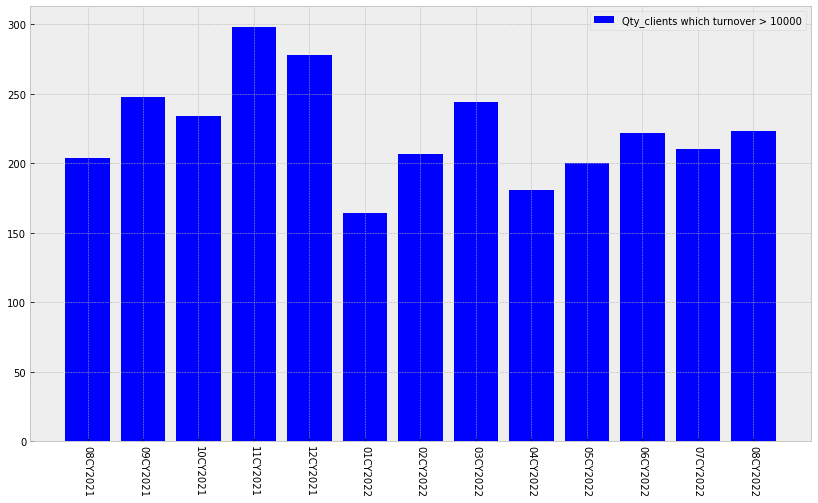

<ipython-input-37-c04fe41b98ad>:22: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



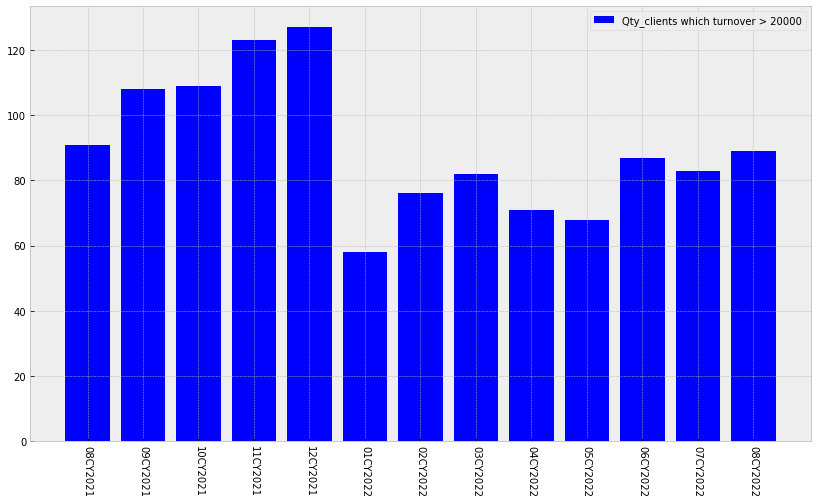

<ipython-input-37-c04fe41b98ad>:22: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



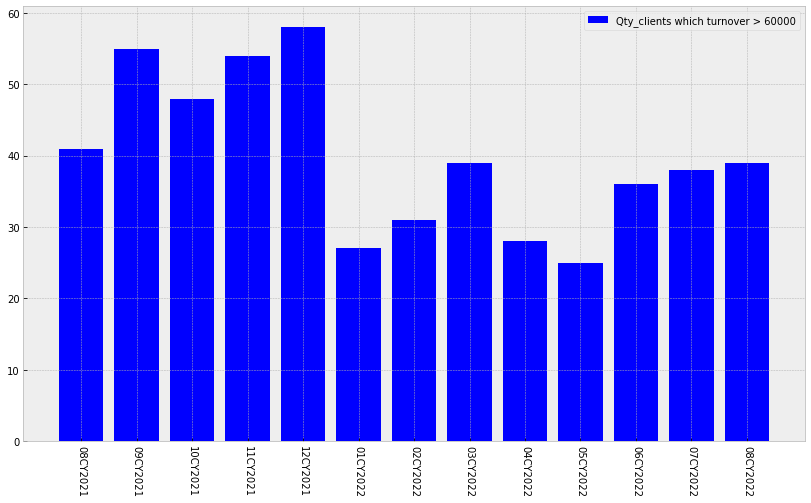

In [37]:
#количество клиентов каждый месяц

clients_turnover_list = [2000,10000,20000,60000]
# clients_turnover_int = 10000

for clients_turnover_int in clients_turnover_list:
    Qty_clients_list = []
    for i in df_columns[1:]:
        Qty_clients_list.append( df[i][ df[i] > clients_turnover_int].count() )

    # print(Qty_clients_list)

    df_Qty_clients_list = pd.Series(Qty_clients_list)
    df_Qty_clients_list.index = df_columns[1:]

    df_Qty_clients_list = pd.DataFrame({'Month':df_Qty_clients_list.index, 'Qty_clients':df_Qty_clients_list.values})
    with plt.style.context('bmh'):
        plt.figure(figsize=(14,8))
#         ax = df_Qty_clients_list['Month']#plt.axes()
        plt.bar(df_Qty_clients_list['Month'], df_Qty_clients_list['Qty_clients'] , color='blue', 
                label = 'Qty_clients which turnover > ' + str(clients_turnover_int)) 
        plt.xticks (Rotation = -90)
        plt.legend()
        plt.show()

#     plot_data = [
#         go.Bar(
#             x=df_Qty_clients_list['Month'],
#             y=df_Qty_clients_list['Qty_clients'],
#         )
#     ]

#     plot_layout = go.Layout(
#             xaxis={"type": "category"},
#             title='Qty_clients which turnover > ' + str(clients_turnover_int)
#         )

#     fig = go.Figure(data=plot_data, layout=plot_layout)
#     pyoff.iplot(fig)


здесь также видно, что кол-во клиентов максимально в декабре и минимально мае. 

Разделим всех клиентов на два типа : старые (Old_Client), которые покупают как минимум (qty_months_dont_buy+1) месяцев подряд
и не работающих (оборот менее sum_minimum_month)(Client_dont_work). Посмотрим как во времени эти параметры менялись

<ipython-input-38-12f6b6cc03a1>:52: UserWarning:

'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>

<ipython-input-38-12f6b6cc03a1>:53: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



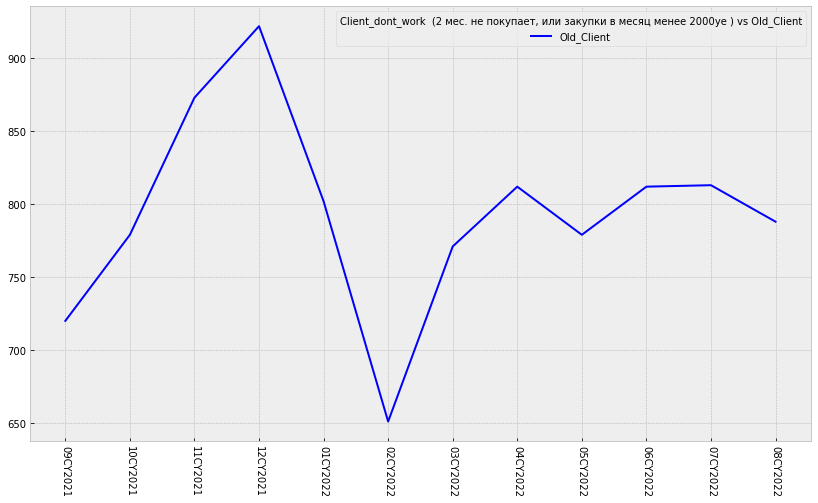

<ipython-input-38-12f6b6cc03a1>:52: UserWarning:

'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>

<ipython-input-38-12f6b6cc03a1>:53: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



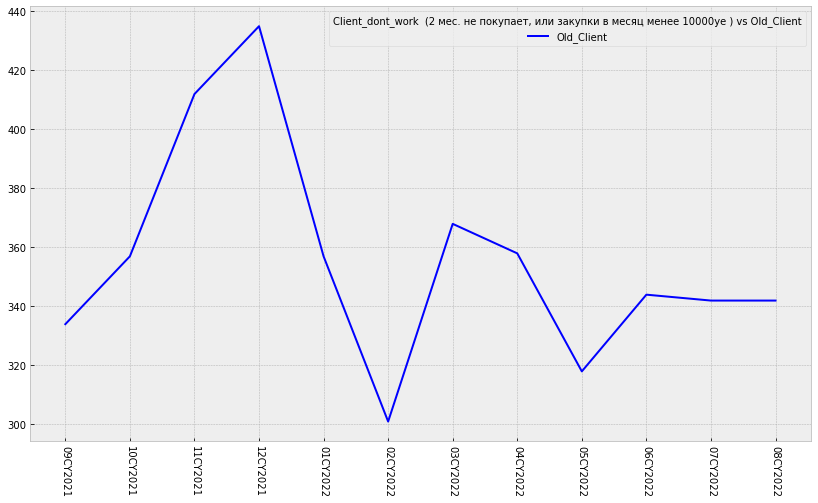

<ipython-input-38-12f6b6cc03a1>:52: UserWarning:

'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>

<ipython-input-38-12f6b6cc03a1>:53: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



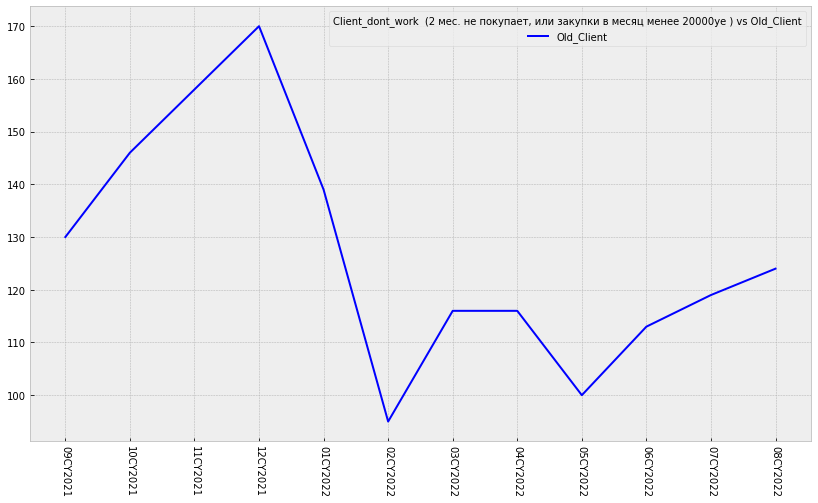

<ipython-input-38-12f6b6cc03a1>:52: UserWarning:

'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>

<ipython-input-38-12f6b6cc03a1>:53: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



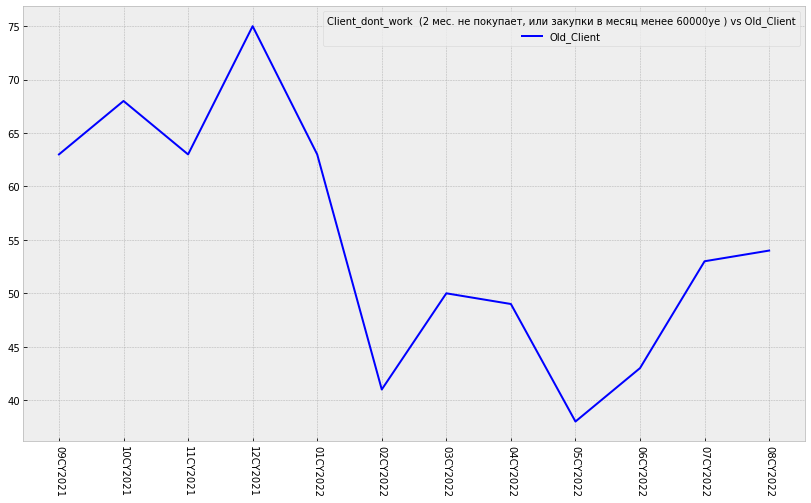

In [38]:
#строим график активных и неактивных клиентов по месяцам
df_new_client = pd.DataFrame({'Month':df_columns[1:]})
qty_months_dont_buy = 1
sum_minimum_month_list = [2000,10000,20000,60000]

for sum_minimum_month in sum_minimum_month_list:

    for index, row in df.iterrows():
        new_client = 0
        list_new_client = []
        for i in df_columns[1:]: 
            if row[i] > sum_minimum_month : 
                new_client = 0 #если есть оборот, то признак нового клиента обнуляем
            else : 
                new_client = new_client + 1
            if new_client > qty_months_dont_buy: #если клиент не берет более qty_months_dont_buy месяцев подряд, то это потенциально новый клиент. Или ушедший
                list_new_client.append('Client_dont_work')
            else :
                list_new_client.append('Old_Client')

        df_new_client[row['Клиент']] = list_new_client

    #транспонируем dataframe для удобства подсчета кол-в разных типов клиентов
    df_new_client_t = df_new_client.T.copy()
    df_new_client_t.columns = df_columns[1:]
    df_new_client_t = df_new_client_t.reset_index(drop=True)
    df_new_client_t.drop([0, 0], inplace = True)
    df_new_client_t.head()

    #считаем кол-ва активных и неактивных клиентов каждый месяц
    df_new_client_status = pd.DataFrame()
    df_new_client_status['Status'] = ['Client_dont_work', 'Old_Client']

    for i in df_columns[1:]:
        list_status_client = []
        list_status_client.append(df_new_client_t[df_new_client_t[i] == 'Client_dont_work'].count()[0])
        list_status_client.append(df_new_client_t[df_new_client_t[i] == 'Old_Client'].count()[0])
        df_new_client_status[i] = list_status_client

        
    with plt.style.context('bmh'):
        plt.figure(figsize=(14,8))
#         ax = df_Qty_clients_list['Month']#plt.axes()
        plt.plot(df_new_client_status.columns[2:], 
                 df_new_client_status[df_new_client_status['Status'] == 'Old_Client'].values.tolist()[0][2:] , color='blue', 
                label = 'Old_Client') 
#         plt.plot(df_new_client_status.columns[1:], 
#                  df_new_client_status[df_new_client_status['Status'] == 'Client_dont_work'].values.tolist()[0][1:] , color='red', 
#                 label = 'Client_dont_work') 
        plt.legend(title='Client_dont_work  (' + str(qty_months_dont_buy+1) + 
                     ' мес. не покупает, или закупки в месяц менее '+str(sum_minimum_month) + 'уе ) vs Old_Client')
        plt.locator_params(axis='x', nbins=10)
        plt.xticks (Rotation = -90)
        plt.show()
        

#     plot_data = [
#         go.Scatter(
#             x=df_new_client_status.columns[1:],
#             y=df_new_client_status[df_new_client_status['Status'] == 'Old_Client'].values.tolist()[0][1:],
#             name = 'Old_Client'
#         ),
#         go.Scatter(
#             x=df_new_client_status.columns[1:],
#             y=df_new_client_status[df_new_client_status['Status'] == 'Client_dont_work'].values.tolist()[0][1:],
#             name = 'Client_dont_work'
#         )
#     ]

#     plot_layout = go.Layout(
#             xaxis={"type": "category"},
#             title='Client_dont_work vs Existing (' + str(qty_months_dont_buy+1) + 
#                     ' мес. не покупает, или закупки в месяц менее '+str(sum_minimum_month) + 'уе )'
#         )
#     fig = go.Figure(data=plot_data, layout=plot_layout)
#     pyoff.iplot(fig)

клиентская база средних клиентов (закупки хотя бы раз в два месяца и более 2 тыс н.у.) растет.
За два последних года с ~500 до 750. В пике было около 1000. В декабре этого года можно предполагать будет в районе 1200  

Крупных клиентов (оборот более 60 тыс у.е. в месяц) порядка 50.   
Обычно на такие обороты 5 клиентов на сейлс менеджера. Кол-во сейлс менеджеров, отвечающих за крупнх клиентов 10.

Средних клиентов (оборот от 20 до 60 тыс у.е.) 120-50 = 70 клиентов.
Здесь примерно 10 клиентов на одного сейлс менеджера. Итого на этот тип клиентов 7 сейлс менеджеров.

Клиентов с оборотом 10-20 тыс у.е. 350-120 = 230. 
Здесь примерно 20 клиентов на одного сейлс менеджера. Итого на этот тип клиентов 12 сейлс менеджеров.

Клиентов с оборотом 2-10 тыс у.е. 800-350 = 550. 
Здесь примерно 50 клиентов на одного сейлс менеджера. Итого на этот тип клиентов 11 сейлс менеджеров.

Клентов с оборотом менее 2 тыс у.е. обслуживает B2B.

Итого отдел продаж ориентировочно должен быть 40 человек на такие обороты
плюс
команда, поддерживающая B2B


# ML

# LogisticRegression

Будем предсказывать оборот августа 08CY2022 по продажам в предыдущем периоде

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
X = df.copy()

del X['08CY2022']
del X['Клиент']

X.head()

,08CY2021,09CY2021,10CY2021,11CY2021,12CY2021,01CY2022,02CY2022,03CY2022,04CY2022,05CY2022,06CY2022,07CY2022
0,42902.8,43678.0,56450.2,13940.4,30524.4,14192.2,18034.4,35431.0,33341.4,3313.4,7553.4,0.2
1,0.0,0.0,0.0,1674.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,441.2,8400.0,0.0,290.4,0.0,4640.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,9208.0,8897.6,0.0,0.0,0.0,0.0,0.0,1898.0,0.0


In [41]:
Y = df['08CY2022'].copy()

In [42]:
Y.head(10)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      6.4
6      0.0
7      0.0
8      0.0
9    370.6
Name: 08CY2022, dtype: float64

заменяем оборот компании согласно следующим критериям:  
1 : оборот менее 200 уе  
2: оборот между 200 и 1000  
3: оборот между 1000 и 2000  
4: оборот между 2000 и 4000  
5: оборот между 4000 и 10 000  
6: оборот между 10 000 и 20 000  
7: оборот между 20 000 и 60 000  
8: оборот более 60 000  

Бизнес это более чем устраивает

In [43]:
criteria = [Y <= 200, Y.between(200, 1000), Y.between(1000, 2000), Y.between(2000, 4000), 
                Y.between(4000, 10000), Y.between(10000, 20000), Y.between(20000, 60000), Y >= 60000]
values = [1, 2, 3, 4, 5, 6, 7, 8]

Y = np.select(criteria, values, 0)
for i in df_columns[1:-1]:      
    criteria = [X[i] <= 200, X[i].between(200, 1000), X[i].between(1000, 2000), X[i].between(2000, 4000), 
                X[i].between(4000, 10000), X[i].between(10000, 20000), X[i].between(20000, 60000), X[i] >= 60000]
    values = [1, 2, 3, 4, 5, 6, 7, 8]
    X[i] = np.select(criteria, values, 0)

In [44]:
X.head()

,08CY2021,09CY2021,10CY2021,11CY2021,12CY2021,01CY2022,02CY2022,03CY2022,04CY2022,05CY2022,06CY2022,07CY2022
0,7,7,7,6,7,6,6,7,7,4,5,1
1,1,1,1,3,1,1,1,1,1,1,1,1
2,1,2,5,1,2,1,5,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,5,5,1,1,1,1,1,3,1


модель логистической регрессии

In [45]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(Y)

In [311]:
# le.classes_

In [45]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

# model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [46]:
# model = LogisticRegression() # берем в качестве модели логистическую регресиию из scikit-learn
model = LogisticRegression(solver='liblinear')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [48]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [49]:
model.score(X_train, y_train) 

0.7741367159971811

In [50]:
model.score(X_test,y_test)

0.7773212818405916

точность выборки на тестовой выборки 78%. Для проверки выставления планов отделом продаж допустимая точность

# Метод опорных векторов. SVM.

In [51]:
from sklearn.svm import SVC

In [52]:
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [53]:
clf.score(X_train, y_train) 

0.8340380549682875

In [54]:
clf.score(X_test, y_test)

0.7945768282662284

точность модели  79%. На 1% выше, чем у LogisticRegression

In [55]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [56]:
svc.score(X_train, y_train)

0.8777307963354475

In [57]:
svc.score(X_test, y_test)

0.7953985209531635

точность модели на тестовой выбоки ~79.5%

# модель LDA

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [59]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [60]:
lda = LinearDiscriminantAnalysis()

In [61]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [62]:
lda.score(X_train, y_train)

0.7660324171952079

In [63]:
lda.score(X_test, y_test)

0.7781429745275267

точность модели на тестовой выбоки ~77.8%

# Arima
Т.к. у нас по сути временной ряд, то посмотрим его с помощью ARIMA
Будем анализировать суммарный оборот компании по месяцам

In [64]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt

import statsmodels.api as smapi



In [65]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


In [66]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

In [67]:
import warnings
warnings.filterwarnings('ignore')

ищем лучшую модель ARIMA в зависимости о параметра order  
order tuple, optional  
The (p,d,q) order of the model for the autoregressive, differences, and moving average components

aic: 378.01070 | order: (0, 2, 1)
Results of Dickey-Fuller Test:
Test Statistic                -4.179317
p-value                        0.000714
#Lags Used                     4.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


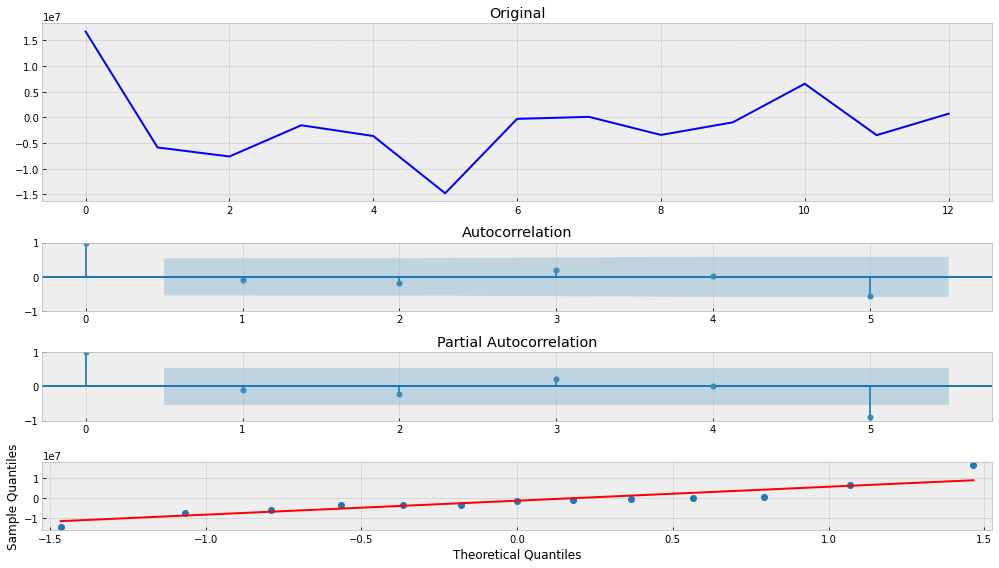

In [72]:
series = list(df_turnover_months['Turnover'])

# model = smapi.tsa.arima.ARIMA(train_data, order=(1,1,2))
# result = model.fit()

best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(2):#7
    for d in range(3): #5
        for j in range(2):#5
             try:
                tmp_mdl = smt.ARIMA(series, order=(i,d,j)).fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j) 
                    best_mdl = tmp_mdl
             except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))


# tsplot(best_mdl.resid, lags=15)
tsplot(best_mdl.resid, lags=5)

корреляция видна каждые 12 месяцев. как и раньше наблюдаем сезональность

In [73]:
from statsmodels.graphics.tsaplots import plot_predict

построим реальный график и предсказанный моделью

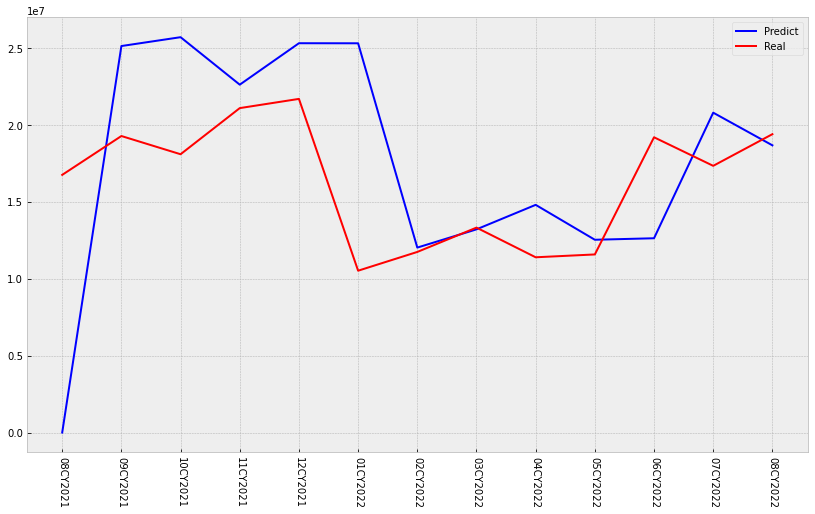

In [74]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
#     best_mdl.plot_predict(1, len(series)+100, ax=ax)
    plt.plot(df_turnover_months['Month'], best_mdl.predict() , color='blue', label='Predict') #(1, len(series)+100, ax=ax)
    plt.plot( df_turnover_months['Month'], series, color='red', label='Real')
    plt.xticks (Rotation = -90)
    plt.legend()
    plt.show()

построим на одном графике LinearRegression, best_mdl(Arima) и др модели

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:

y = np.array(series) #оборот в месяц
X = range(len(y)) # месяц
X = np.array(X)
X = X.reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,  random_state = 42)

In [77]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
#     svm.SVR(),
#     linear_model.SGDRegressor(),
#     linear_model.BayesianRidge(),
    linear_model.LassoLars(),
#     linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]
clf = []

for item in classifiers:
    print(item)
    clf.append(item) #clf = item
    clf[len(clf)-1].fit(X_train, y_train)
    print(clf[len(clf)-1].score(X_test,y_test ),'\n')

LassoLars()
-0.8977810029080695 

PassiveAggressiveRegressor()
-24.926108431585842 

TheilSenRegressor(max_subpopulation=10000)
-2.712154480659237 

LinearRegression()
-0.8977797664182539 



In [78]:
clf

[LassoLars(),
 PassiveAggressiveRegressor(),
 TheilSenRegressor(max_subpopulation=10000),
 LinearRegression()]

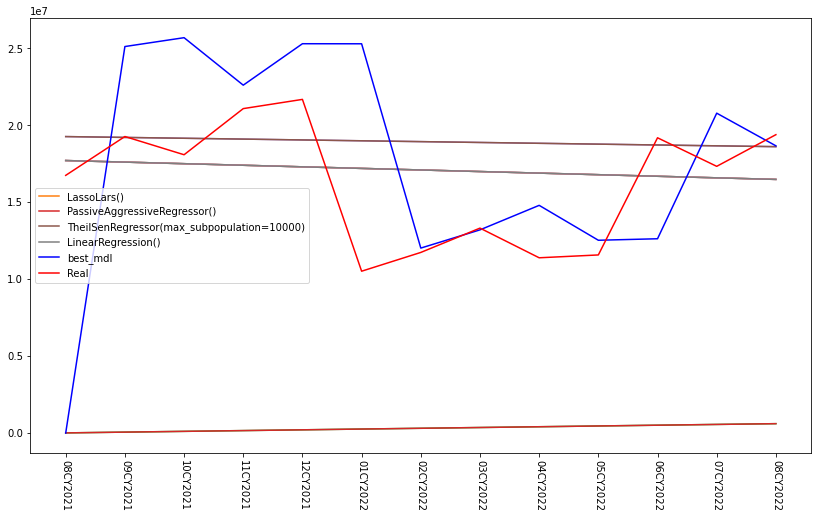

In [79]:
plt.figure(figsize=(14,8))
for model_temp in clf :
    plt.plot(df_turnover_months['Month'], model_temp.predict(X))
    plt.plot(df_turnover_months['Month'], model_temp.predict(X), label=model_temp)
#     plt.plot(df_turnover_months['Month'], model_temp.predict(X),color='green')
#     plt.plot(df_turnover_months['Month'], model_temp.predict(X),color='green', label='LinearRegression')


ax = plt.axes()
# best_mdl.plot_predict(1, len(series)+100, ax=ax)
plt.plot(df_turnover_months['Month'],best_mdl.predict() , color='blue', label='best_mdl') #(1, len(series)+100, ax=ax)
plt.plot(df_turnover_months['Month'], series, color='red', label='Real')
plt.xticks (Rotation = -90)
plt.legend()
plt.show()

отрисуем интервалы и предсказания будущих периодов (3 месяца). Модель best_mdl


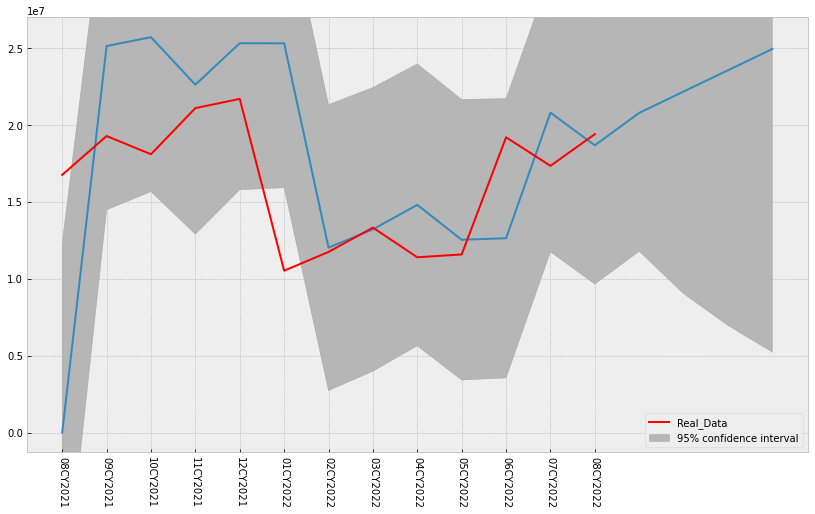

In [155]:
from statsmodels.graphics.tsaplots import plot_predict
# df_month_name = list(df_turnover_months['Month'])
# df_month_name.append( '09CY2022')#, '10CY2022','11CY2022')
# df_month_name.append( '10CY2022')
# df_month_name.append( '11CY2022')

with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
#     best_mdl.plot_predict(1, len(series)+100, ax=ax)
    plot_predict( best_mdl, 0, len(series)+3, ax=ax, label='predict')
    plt.plot(df_turnover_months['Month'], series, color='red', label='Real_Data')
#     plt.plot(series, color='blue', label='best_mdl')
    plt.xticks (Rotation = -90)
    plt.legend()
    plt.show()

# Модель экспоненциального сглаживания

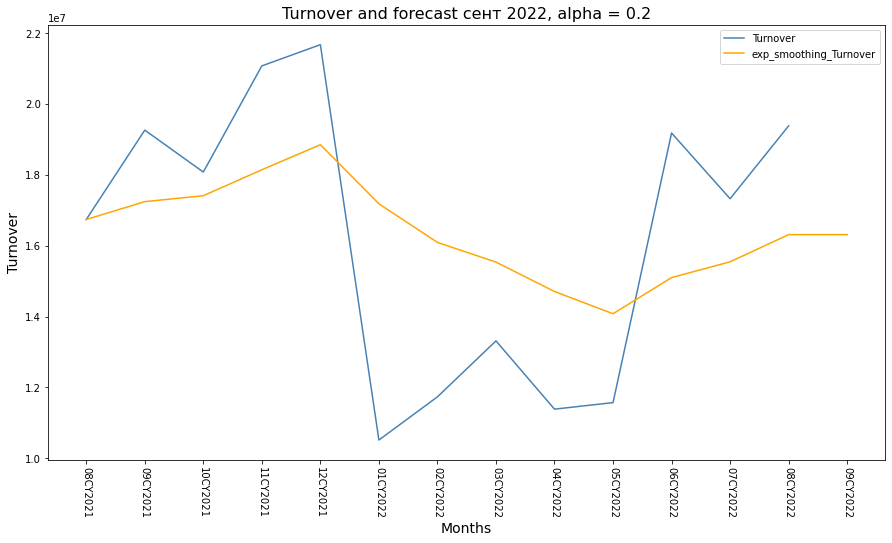

forecast сент 2022 16316851.58646447


In [85]:
# В модели экспоненциального сглаживания (exponential smoothing) или экспоненциального скользящего среднего 
# мы как раз (1) берем все предыдущие значения и (2) задаем каждому из наблюдений определенный вес и 
# (экспоненциально) уменьшаем этот вес по мере углубления в прошлое.
alpha = 0.2
 
# первое значение совпадает со значением временного ряда
# exp_smoothing = [births['Births'][0]]
exp_smoothing = [df_turnover_months['Turnover'][0]]
df_exp_months = [df_turnover_months['Month'][0]]
 
# в цикле for последовательно применяем формулу ко всем элементам ряда
for i in range(1, len(df_turnover_months['Month'])):
    exp_smoothing.append(alpha * df_turnover_months['Turnover'][i] + (1 - alpha) * exp_smoothing[i - 1])
    df_exp_months.append(df_turnover_months['Month'][i])
 
df_exp_months.append('09CY2022')
df_turnover_months['Exp_smoothing'] = exp_smoothing
# df_turnover_months.head(5)#['Exp_smoothing']


# зададим размер
plt.figure(figsize = (15,8))

forecast_turnover_exp = alpha * df_turnover_months['Turnover'][len(df_turnover_months['Month'])-1] + (1 - alpha) * exp_smoothing[len(df_turnover_months['Month']) - 2]
exp_smoothing.append(forecast_turnover_exp)
# выведем данные о рождаемости и кривую экспоненциального сглаживания
plt.plot(df_turnover_months['Month'], df_turnover_months['Turnover'], label = 'Turnover', color = 'steelblue')
# plt.plot(df_turnover_months['Exp_smoothing'], label = 'exp_smoothing_Turnover', color = 'orange')
plt.plot(df_exp_months, exp_smoothing, label = 'exp_smoothing_Turnover', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
# plt.legend(title = '', loc = 'upper left', fontsize = 14)
# добавим подписи к осям и заголовки
plt.legend()
plt.ylabel('Turnover', fontsize = 14)
plt.xlabel('Months', fontsize = 14)
plt.title('Turnover and forecast сент 2022, alpha = ' + str(alpha), fontsize = 16)
plt.xticks (Rotation = -90)
 
plt.show()

print('forecast сент 2022' , exp_smoothing[-1])

# Нейронные сети  (прогноз оборота компании)

In [86]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [87]:
#ещё раз сформирует выборки. Будем прогнозировать август 22
#критерии такие же как и вверху. 
X = df.copy()
del X['08CY2022']
del X['Клиент']
Y = df['08CY2022'].copy()

criteria = [Y <= 200, Y.between(200, 1000), Y.between(1000, 2000), Y.between(2000, 4000), 
                Y.between(4000, 10000), Y.between(10000, 20000), Y.between(20000, 60000), Y >= 60000]
values = [1, 2, 3, 4, 5, 6, 7, 8]

Y = np.select(criteria, values, 0)
for i in df_columns[1:-1]:     
    criteria = [X[i] <= 200, X[i].between(200, 1000), X[i].between(1000, 2000), X[i].between(2000, 4000), 
                X[i].between(4000, 10000), X[i].between(10000, 20000), X[i].between(20000, 60000), X[i] >= 60000]
    values = [1, 2, 3, 4, 5, 6, 7, 8]
    X[i] = np.select(criteria, values, 0)

qty_months_int = X.shape[1]
qty_output_int = len(set(Y)) #max(X.nunique())

In [88]:
#формируем слои сети
# на входе количество месяцев qty_months_int
# на выходе критерий qty_output_int

inputs = keras.Input(shape=(qty_months_int,)) # qty months - количество месяцев 
x = layers.Dense(32)(inputs) ### объявление слоя
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Activation('relu')(x)
#x = dense1(inputs) ### указание входного тензора

y = layers.Dense(32)(inputs)
y = layers.BatchNormalization()(y)
y = layers.Dropout(0.5)(y)
y = layers.Activation('relu')(y)

dense21 = layers.Dense(32, activation="relu")(x)
dense22 = layers.Dense(32, activation='relu')(y)

dense3 = layers.Add()([dense21, dense22])

In [89]:
x = layers.Dense(32, activation="relu")(dense3)
outputs = layers.Dense(qty_output_int+1)(x)

In [90]:
model = keras.Model(inputs=inputs, outputs=outputs, name="diplom_model_Keras")

In [91]:
model.summary()

Model: "diplom_model_Keras"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           416         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           416         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32)          128         ['dense[0][0]']                  
 alization)                                                                      

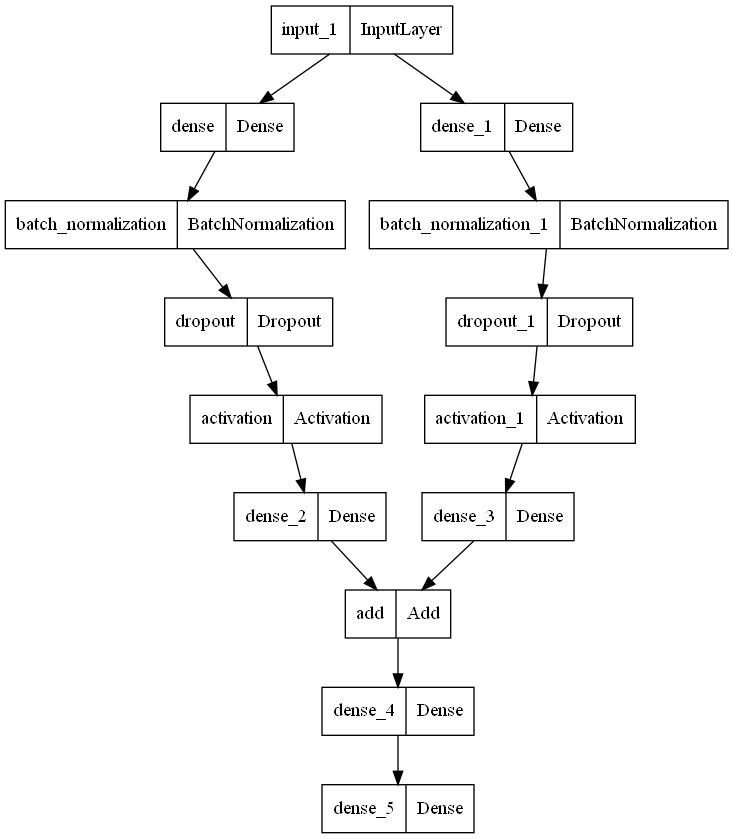

In [92]:
keras.utils.plot_model(model, "diplom_model_Keras.png")

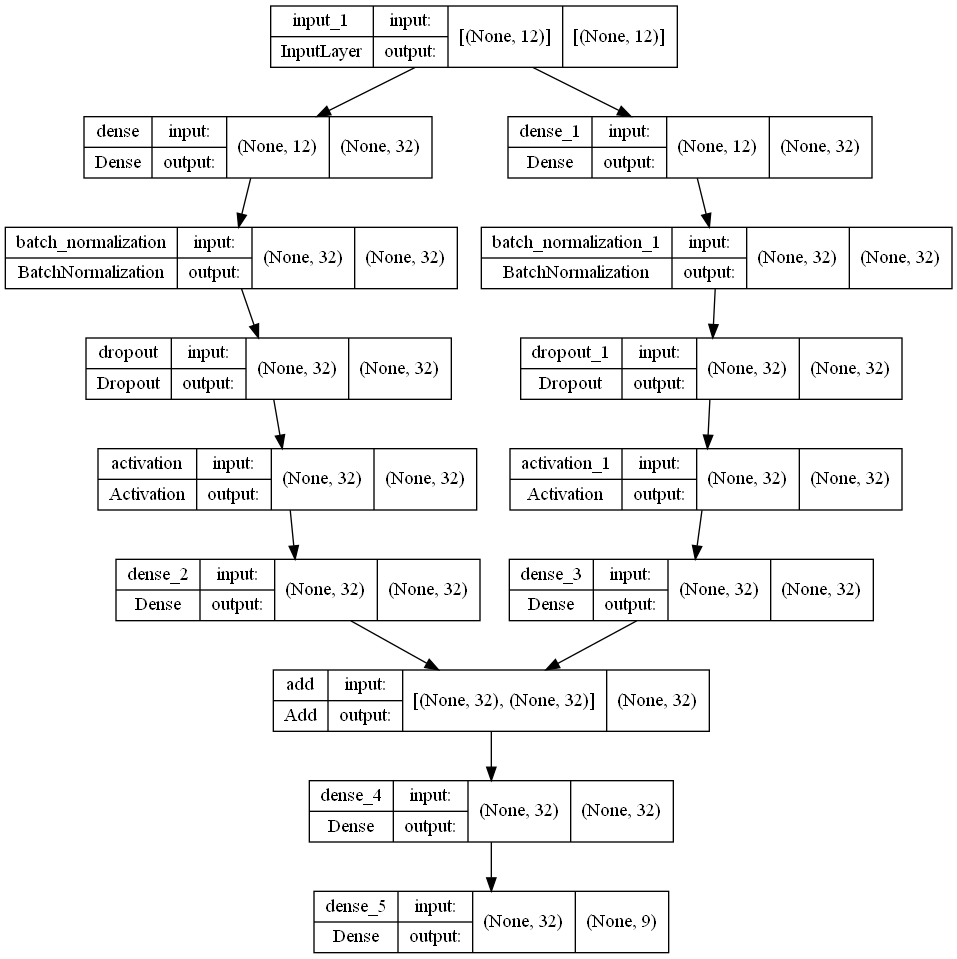

In [93]:
keras.utils.plot_model(model, "diplom_model_Keras_shape.png", show_shapes=True)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [95]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), ### ОТЛИЧИЕ_ОТ_CategoricalCrossEntropy
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(X_train, y_train, batch_size=4, epochs=10, validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/10
568/568 [==============================] - 8s 7ms/step - loss: 1.0369 - accuracy: 0.7423 - val_loss: 0.8544 - val_accuracy: 0.7641
Epoch 2/10
568/568 [==============================] - 3s 6ms/step - loss: 0.9398 - accuracy: 0.7577 - val_loss: 0.8141 - val_accuracy: 0.7711
Epoch 3/10
568/568 [==============================] - 3s 6ms/step - loss: 0.9229 - accuracy: 0.7577 - val_loss: 0.8121 - val_accuracy: 0.7694
Epoch 4/10
568/568 [==============================] - 3s 6ms/step - loss: 0.9274 - accuracy: 0.7573 - val_loss: 0.8121 - val_accuracy: 0.7676
Epoch 5/10
568/568 [==============================] - 3s 6ms/step - loss: 0.9330 - accuracy: 0.7564 - val_loss: 0.8099 - val_accuracy: 0.7676
Epoch 6/10
568/568 [==============================] - 3s 6ms/step - loss: 0.9057 - accuracy: 0.7573 - val_loss: 0.8043 - val_accuracy: 0.7676
Epoch 7/10
568/568 [==============================] - 3s 6ms/step - loss: 0.9156 - accuracy: 0.7564 - val_loss: 0.8452 - val_accuracy: 0.7835
Epoch 

точность на тестовой выборки 78%. В принципе такая же как и на других моделях

Введем в модель предсказания месячного суммарного оборота компании  
курс USD средний за месяц  
курс USD макс за месяц  
курс USD мин за месяц  
ставка рефинанс (какая была в месяце)  
температура средняя в месяце  
индекс РТС  
цена нефть USD средняя за месяц   
цена нефть USD мин за месяц   
цена нефть USD макс за месяц  


In [74]:
# from datetime import datetime

In [96]:
df_brent = pd.read_csv('Brent1.csv', sep = ';', decimal=',')

In [97]:
df_brent.head()

,Month,Brent_price,Brent_Max,Brent_Min,Brent_Volume
0,08CY2022,95.64,104.41,91.52,0.29
1,07CY2022,110.01,114.75,94.50,4.28
2,06CY2022,114.81,125.19,107.03,4.46
3,05CY2022,122.84,125.28,101.30,4.50
4,04CY2022,109.34,114.84,97.57,3.80


In [98]:
df_RTS = pd.read_csv('RTS.csv', sep = ';', decimal=',')

In [99]:
df_RTS.head()

,Month,RTS_price,RTS_open,RTS_max,RTS_min
0,08CY2022,1258.45,1131.74,1273.96,1069.35
1,07CY2022,1129.24,1345.75,1345.75,1082.62
2,06CY2022,1345.01,1203.66,1495.66,1155.91
3,05CY2022,1208.12,1085.11,1324.10,1070.14
4,04CY2022,1081.52,1027.84,1132.71,885.44


In [100]:
df_Temperature = pd.read_csv('Temperature.csv',sep = ';', decimal=',')

In [101]:
df_Temperature.head()

,Month,Temperature
0,01CY2019,-6.6
1,02CY2019,-1.4
2,03CY2019,0.7
3,04CY2019,8.1
4,05CY2019,16.3


In [102]:
df_Stavka_refinans = pd.read_csv('Stavka_refinans.csv',sep = ';', decimal=',')

In [103]:
df_Stavka_refinans.head()

,Month,Stavka_Refinans
0,01CY2019,7.75
1,02CY2019,7.75
2,03CY2019,7.75
3,04CY2019,7.75
4,05CY2019,7.75


In [104]:
# result_1 = pd.concat([df_brent, df_RTS, df_Temperature, df_Stavka_refinans ])
df_join = df_brent.join(df_RTS.set_index('Month'), on='Month')

In [105]:
df_join = df_join.join(df_Temperature.set_index('Month'), on='Month')

In [106]:
df_join = df_join.join(df_Stavka_refinans.set_index('Month'), on='Month')

In [107]:
df_join = df_join.join(df_turnover_months[['Month', 'Turnover']].set_index('Month'), on='Month')

In [109]:
df_join.head()

,Month,Brent_price,Brent_Max,Brent_Min,Brent_Volume,RTS_price,RTS_open,RTS_max,RTS_min,Temperature,Stavka_Refinans,Turnover
0,08CY2022,95.64,104.41,91.52,0.29,1258.45,1131.74,1273.96,1069.35,25.0,8.0,19388322.2
1,07CY2022,110.01,114.75,94.50,4.28,1129.24,1345.75,1345.75,1082.62,23.0,9.5,17330522.2
2,06CY2022,114.81,125.19,107.03,4.46,1345.01,1203.66,1495.66,1155.91,18.9,9.5,19186653.2
3,05CY2022,122.84,125.28,101.30,4.50,1208.12,1085.11,1324.10,1070.14,10.7,14.0,11572625.0
4,04CY2022,109.34,114.84,97.57,3.80,1081.52,1027.84,1132.71,885.44,5.8,17.0,11388385.6


In [110]:
df_join['Sum_3previous_months'] = df_join['Turnover'].shift(-1) + df_join['Turnover'].shift(-2) + df_join['Turnover'].shift(-3)
df_join['Sum_3previous_months'][len(df_join)-1] = df_join['Turnover'][len(df_join)-1]
df_join['Sum_3previous_months'][len(df_join)-2] = df_join['Turnover'][len(df_join)-2] + df_join['Turnover'][len(df_join)-1]
df_join['Sum_3previous_months'][len(df_join)-3] = df_join['Turnover'][len(df_join)-3] + df_join['Turnover'][len(df_join)-2] + df_join['Turnover'][len(df_join)-3]

In [111]:
df_join['Year'] = df_join['Month'].str[4:]
df_join['Month'] = df_join['Month'].str[:2]

In [112]:
# from sklearn import preprocessing
# df_join_normalize = preprocessing.normalize(df_join, axis=0)
df_join_normalize = df_join.copy()

In [113]:
# df_join_normalize = pd.DataFrame(df_join_normalize, columns=df_join.columns)
df_join_normalize.head()




,Month,Brent_price,Brent_Max,Brent_Min,Brent_Volume,RTS_price,RTS_open,RTS_max,RTS_min,Temperature,Stavka_Refinans,Turnover,Sum_3previous_months,Year
0,08,95.64,104.41,91.52,0.29,1258.45,1131.74,1273.96,1069.35,25.0,8.0,19388322.2,48089800.4,2022
1,07,110.01,114.75,94.50,4.28,1129.24,1345.75,1345.75,1082.62,23.0,9.5,17330522.2,42147663.8,2022
2,06,114.81,125.19,107.03,4.46,1345.01,1203.66,1495.66,1155.91,18.9,9.5,19186653.2,36276973.8,2022
3,05,122.84,125.28,101.30,4.50,1208.12,1085.11,1324.10,1070.14,10.7,14.0,11572625.0,36439999.8,2022
4,04,109.34,114.84,97.57,3.80,1081.52,1027.84,1132.71,885.44,5.8,17.0,11388385.6,35567834.4,2022


In [115]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df_join_normalize['Month'])
# Drop column B as it is now encoded
df_join_normalize = df_join_normalize.drop('Month',axis = 1)
# Join the encoded df
df_join_normalize = df_join_normalize.join(one_hot) 

In [116]:
df_join_normalize.head()

,Brent_price,Brent_Max,Brent_Min,Brent_Volume,RTS_price,RTS_open,RTS_max,RTS_min,Temperature,Stavka_Refinans,...,03,04,05,06,07,08,09,10,11,12
0,95.64,104.41,91.52,0.29,1258.45,1131.74,1273.96,1069.35,25.0,8.0,...,0,0,0,0,0,1,0,0,0,0
1,110.01,114.75,94.50,4.28,1129.24,1345.75,1345.75,1082.62,23.0,9.5,...,0,0,0,0,1,0,0,0,0,0
2,114.81,125.19,107.03,4.46,1345.01,1203.66,1495.66,1155.91,18.9,9.5,...,0,0,0,1,0,0,0,0,0,0
3,122.84,125.28,101.30,4.50,1208.12,1085.11,1324.10,1070.14,10.7,14.0,...,0,0,1,0,0,0,0,0,0,0
4,109.34,114.84,97.57,3.80,1081.52,1027.84,1132.71,885.44,5.8,17.0,...,0,1,0,0,0,0,0,0,0,0


In [118]:
df_join_normalize['Sum_3previous_months'].max()

60846994.99999999

In [119]:
X = df_join_normalize.copy()
del X['Turnover']
# del X['Year']
# del X['RTS_open']
# del X['Temperature']
Y = df_join_normalize['Turnover'].copy()

# criteria = [Y <= 0.1, 
#                 Y.between(0.1, 0.15), Y.between(0.15, 0.2), Y.between(0.2, 0.25), Y >= 0.25]
criteria = [Y <= 5000000, 
                Y.between(5000000, 8000000), Y.between(8000000, 12000000), Y.between(12000000, 18000000), Y >= 18000000]
values = [1, 2, 3, 4, 5]

Y = np.select(criteria, values, 0)



In [120]:
criteria_X = [X['Sum_3previous_months'] <= 15000000, 
              X['Sum_3previous_months'].between(15000000, 24000000), 
              X['Sum_3previous_months'].between(24000000, 36000000), 
              X['Sum_3previous_months'].between(36000000, 54000000), 
              X['Sum_3previous_months']>= 54000000]

# criteria_X = [X['Sum_3previous_months'] <= 0.1, 
#               X['Sum_3previous_months'].between(0.1, 0.15), 
#               X['Sum_3previous_months'].between(0.15, 0.2), 
#               X['Sum_3previous_months'].between(0.2, 0.25), 
#               X['Sum_3previous_months']>= 0.25]

values_X = [1, 2, 3, 4, 5]

X['Sum_3previous_months'] = np.select(criteria_X, values, 0)

In [121]:
X.head()

,Brent_price,Brent_Max,Brent_Min,Brent_Volume,RTS_price,RTS_open,RTS_max,RTS_min,Temperature,Stavka_Refinans,...,03,04,05,06,07,08,09,10,11,12
0,95.64,104.41,91.52,0.29,1258.45,1131.74,1273.96,1069.35,25.0,8.0,...,0,0,0,0,0,1,0,0,0,0
1,110.01,114.75,94.50,4.28,1129.24,1345.75,1345.75,1082.62,23.0,9.5,...,0,0,0,0,1,0,0,0,0,0
2,114.81,125.19,107.03,4.46,1345.01,1203.66,1495.66,1155.91,18.9,9.5,...,0,0,0,1,0,0,0,0,0,0
3,122.84,125.28,101.30,4.50,1208.12,1085.11,1324.10,1070.14,10.7,14.0,...,0,0,1,0,0,0,0,0,0,0
4,109.34,114.84,97.57,3.80,1081.52,1027.84,1132.71,885.44,5.8,17.0,...,0,1,0,0,0,0,0,0,0,0


In [122]:
# model = LogisticRegression() # берем в качестве модели логистическую регресиию из scikit-learn
model = LogisticRegression(solver='liblinear')

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [124]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [125]:
model.score(X_train, y_train) 

1.0

In [126]:
model.score(X_test,y_test)

0.6666666666666666

In [127]:
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [128]:
clf.score(X_train, y_train) 

1.0

In [129]:
clf.score(X_test, y_test)

0.6666666666666666

In [130]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [131]:
svc.score(X_train, y_train)

1.0

In [132]:
svc.score(X_test, y_test)

0.6666666666666666

In [133]:
lda = LinearDiscriminantAnalysis()

In [134]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [135]:
lda.score(X_train, y_train)

1.0

In [136]:
lda.score(X_test, y_test)

0.6666666666666666

In [137]:
len(set(Y))
# X.shape[1]

4

In [140]:
#формируем слои сети
# на входе количество месяцев qty_months_int
# на выходе критерий qty_output_int
qty_months_int = X.shape[1]
# qty_output_int = max(X.nunique())
qty_output_int = len(set(Y))+1

inputs = keras.Input(shape=(qty_months_int,)) # qty months - количество месяцев (month)
x = layers.Dense(16)(inputs) ### объявление слоя (32)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

x = layers.Activation('relu')(x)
#x = dense1(inputs) ### указание входного тензора

y = layers.Dense(16)(inputs) #32
y = layers.BatchNormalization()(y)
y = layers.Dropout(0.5)(y)
y = layers.Activation('relu')(y)

dense21 = layers.Dense(16, activation="relu")(x) #32
dense22 = layers.Dense(16, activation='relu')(y) #32

dense3 = layers.Add()([dense21, dense22])

x = layers.Dense(16, activation="relu")(dense3) #32
outputs = layers.Dense(qty_output_int+1)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="diplom_model_Keras")

In [141]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), ### ОТЛИЧИЕ_ОТ_CategoricalCrossEntropy
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(np.array(X_train, dtype=np.float), np.array(y_train, dtype=np.float), batch_size=16, 
                    epochs=10, validation_split=0.3)

test_scores = model.evaluate(np.array(X_test, dtype=np.float), np.array(y_test, dtype=np.float), verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/10
2/2 [==============================] - 5s 571ms/step - loss: 1.5734 - accuracy: 0.3333 - val_loss: 6.9546 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 75ms/step - loss: 1.5152 - accuracy: 0.5417 - val_loss: 2.7935 - val_accuracy: 0.5455
Epoch 3/10
2/2 [==============================] - 0s 83ms/step - loss: 1.4810 - accuracy: 0.6667 - val_loss: 1.7972 - val_accuracy: 0.6364
Epoch 4/10
2/2 [==============================] - 0s 87ms/step - loss: 1.5675 - accuracy: 0.6250 - val_loss: 1.6822 - val_accuracy: 0.7273
Epoch 5/10
2/2 [==============================] - 0s 91ms/step - loss: 1.3044 - accuracy: 0.6250 - val_loss: 1.7029 - val_accuracy: 0.7273
Epoch 6/10
2/2 [==============================] - 0s 91ms/step - loss: 1.4435 - accuracy: 0.5417 - val_loss: 1.5638 - val_accuracy: 0.7273
Epoch 7/10
2/2 [==============================] - 0s 87ms/step - loss: 1.2642 - accuracy: 0.8333 - val_loss: 1.4515 - val_accuracy: 0.7273
Epoch 8/10
2/2 [======